In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
features_to_drop = []
with open("features_to_drop.txt","r")as f:
    for line in f.readlines():
        features_to_drop.append(line.strip("\n"))
features_to_drop

['DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi']

In [3]:
train = pd.read_csv("data/training.csv")
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
X_train = train.iloc[:,1:-2]
y_train = train.iloc[:,-1]

X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
X_train = X_train.drop(features_to_drop, axis=1)
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_train)

X_train = minmax.transform(X_train)
X_valid = minmax.transform(X_valid)

In [9]:
num_features = X_train.shape[1]
num_class = 2
num_hidden_units = 50

In [18]:
# Creates a graph.
with tf.device('/gpu:2'):
    X = tf.placeholder(shape=[None, num_features], dtype=tf.float32, name="x_input")
    y = tf.placeholder(shape=[None, num_class], dtype=tf.int32, name="y_input")
    keep_prob = tf.placeholder(tf.float32)

    # Create 1st hidden layer
    W_1 = tf.multiply(tf.Variable(tf.random_normal([num_features, num_hidden_units], mean=0, stddev=1)), tf.sqrt(2.0/num_features))
    b_1 = tf.Variable(tf.zeros([num_hidden_units]))

    # Create 2nd hidden layer
    W_2 = tf.multiply(tf.Variable(tf.random_normal([num_hidden_units, num_class], mean=0, stddev=1)), tf.sqrt(2.0/num_hidden_units))
    b_2 = tf.Variable(tf.zeros([num_class]))

    logits_1 = tf.add(tf.matmul(X, W_1), b_1)
    logits_1_dropout = tf.nn.dropout(logits_1, keep_prob)
    act_1 = tf.nn.relu(logits_1_dropout)

    logits_2 = tf.add(tf.matmul(act_1, W_2), b_2)
    output_logits = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits_2)

    output_pred = tf.nn.softmax(logits_2)

    loss = tf.reduce_mean(output_logits)

    train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(output_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
sess.run(tf.global_variables_initializer())

In [19]:
y_t = np.zeros([len(y_train), 2], dtype=np.int32)
y_t[(range(len(y_train)), y_train)] = 1

In [20]:
y_v = np.zeros([len(y_valid), 2], dtype=np.int32)
y_v[(range(len(y_valid)), y_valid)] = 1

In [21]:
loss_track = []
num_epochs = 20000
batch_size = 150
total_batches = len(X_train)/batch_size
for i in range(20000):
    for j in range(total_batches):
        X_batch = X_train[j*batch_size:(j+1)*batch_size]
        y_batch = y_t[j*batch_size:(j+1)*batch_size]
            
        _, l = sess.run([train_step, loss],{X:X_batch, y:y_batch, keep_prob:0.5})
        
    if i%100==0:
        train_accuracy = sess.run(accuracy,{X:X_batch, y:y_batch, keep_prob:1.0})
        valid_accuracy = sess.run(accuracy,{X:X_valid, y:y_v, keep_prob:1.0})
        loss_track.append(l)
        print "Epoch",i
        print("Train Accuracy: %f, Valid Accuracy: %f, Loss: %f"%(train_accuracy, valid_accuracy, l))

Epoch 0
Train Accuracy: 0.520000, Valid Accuracy: 0.558670, Loss: 0.910159
Epoch 100
Train Accuracy: 0.693333, Valid Accuracy: 0.716450, Loss: 0.574120
Epoch 200
Train Accuracy: 0.706667, Valid Accuracy: 0.743250, Loss: 0.544400
Epoch 300
Train Accuracy: 0.713333, Valid Accuracy: 0.756625, Loss: 0.547177
Epoch 400
Train Accuracy: 0.733333, Valid Accuracy: 0.766470, Loss: 0.517147
Epoch 500
Train Accuracy: 0.746667, Valid Accuracy: 0.775700, Loss: 0.502701
Epoch 600
Train Accuracy: 0.740000, Valid Accuracy: 0.784220, Loss: 0.554763
Epoch 700
Train Accuracy: 0.753333, Valid Accuracy: 0.790150, Loss: 0.486868
Epoch 800
Train Accuracy: 0.766667, Valid Accuracy: 0.794921, Loss: 0.532127
Epoch 900
Train Accuracy: 0.760000, Valid Accuracy: 0.798285, Loss: 0.482402
Epoch 1000
Train Accuracy: 0.760000, Valid Accuracy: 0.801205, Loss: 0.498710
Epoch 1100
Train Accuracy: 0.753333, Valid Accuracy: 0.803775, Loss: 0.478443
Epoch 1200
Train Accuracy: 0.773333, Valid Accuracy: 0.805880, Loss: 0.47241

KeyboardInterrupt: 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.tsplot(loss_track)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


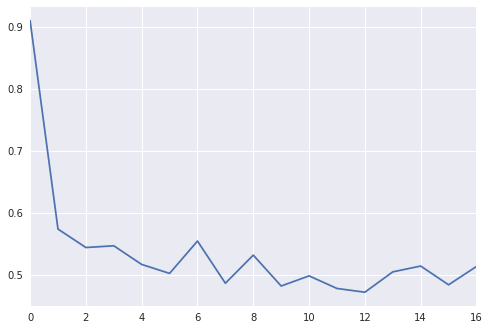

In [24]:
plt.show()